In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

all_train_data = pd.read_csv('TrainOnMe.csv', sep=',', na_values='?')

In [2]:
num_cols = ['x1', 'x2', 'x3', 'x4', 'x7', 'x8', 'x9', 'x10']
cat_cols = ['x5', 'x6']

# data preprocessing function
def data_prepocessing(df): 
    df = df.iloc[:, 1:]
    df = df.dropna()
    
    for col in num_cols:
        df[col] = df[col].astype('float')
    
    df = df[(df.x7 > -10) & (df.x8 < 10)]
    
    if df.x5.dtype == 'bool':
        df.x5 = df.x5.replace({True: 1, False: 0})
    if df.x5.dtype == 'O':
        df.x5 = df.x5.replace({'True': 1, 'False': 0})
    df.x6 = df.x6.replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'Fx': 6})
    
    return df

In [3]:
# preprocess data and extract features and labels
all_train_data = data_prepocessing(all_train_data)

num_features = all_train_data[num_cols]
cat_features = all_train_data[cat_cols]
labels = all_train_data.y

all_train_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
count,994.00,994.00,994.00,994.00,994.00,994.00,994.00,994.00,994.00,994.00
mean,0.01,0.02,-0.45,0.55,0.31,3.59,-0.07,-0.21,-1.00,1.14
std,1.38,1.01,0.41,0.35,0.46,2.16,1.44,1.32,2.00,1.27
min,-5.19,-3.08,-1.49,-0.07,0.00,0.00,-3.47,-3.16,-7.07,-3.02
25%,-1.01,-0.66,-0.72,0.27,0.00,1.00,-1.11,-1.14,-2.35,0.33
50%,0.06,0.00,-0.43,0.53,0.00,5.00,-0.36,-0.49,-1.38,1.13
75%,0.95,0.72,-0.12,0.79,1.00,5.00,0.90,0.50,-0.08,1.92
max,4.73,3.37,0.41,1.38,1.00,6.00,5.18,4.75,6.24,6.00


In [4]:
# check number of samples in each class
classes, cnts = np.unique(labels, return_counts=True)
print('classes:\n  {}'.format(classes))
print('samples:\n  {}'.format(cnts))
print('%:\n  {}'.format(cnts/len(labels)))

classes:
  ['Atsuto' 'Bob' 'Jörg']
samples:
  [295 516 183]
%:
  [0.29678068 0.51911469 0.18410463]


In [5]:
# convert to numerical labels
labels = labels.replace({'Atsuto': 0, 'Bob': 1, 'Jörg': 2})

In [6]:
# function to plot histogram of features
def features_hist(df):
    n_bins = 50
    for col in num_cols:
        ax = plt.subplots(figsize=(6,3))
        ax = plt.hist(df[col], bins=n_bins)
        title="Histogram of " + col
        plt.title(title, fontsize=12)
        plt.show()

In [7]:
# transform data to Gaussian-like
from sklearn.preprocessing import PowerTransformer

def feature_transformer(df):
    pt = PowerTransformer(standardize=False)
    transformed = pd.DataFrame(pt.fit_transform(df))

    transformed.columns=df.columns
    transformed.index=df.index
    
    return transformed

In [8]:
# transform features
num_features_transformed = feature_transformer(num_features)

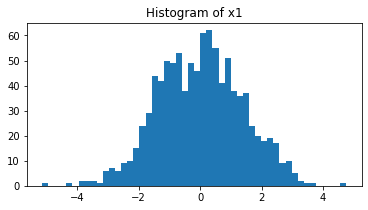

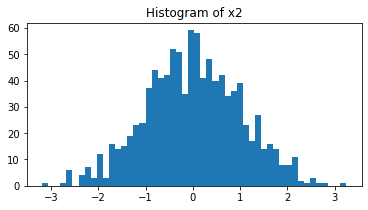

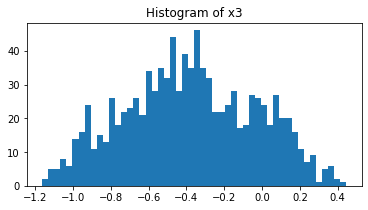

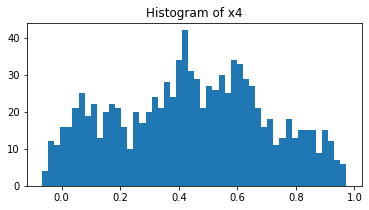

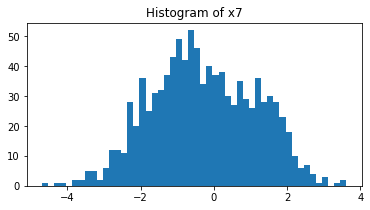

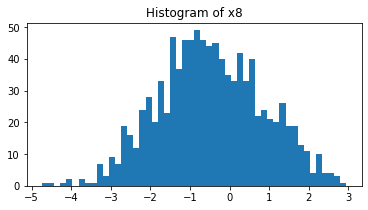

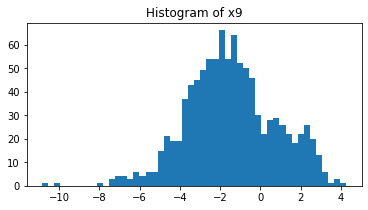

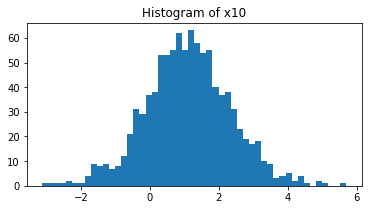

In [9]:
# plot histogram
features_hist(num_features_transformed)

In [10]:
# check correlation of features
cor = num_features_transformed.corr(method='pearson')
cor

,x1,x2,x3,x4,x7,x8,x9,x10
x1,1.00,-0.34,0.04,-0.03,0.02,-0.01,0.03,-0.01
x2,-0.34,1.00,0.04,-0.04,-0.03,0.01,-0.02,0.06
x3,0.04,0.04,1.00,-0.98,-0.26,-0.24,-0.18,-0.04
x4,-0.03,-0.04,-0.98,1.00,0.26,0.24,0.18,0.05
x7,0.02,-0.03,-0.26,0.26,1.00,0.41,0.34,0.05
x8,-0.01,0.01,-0.24,0.24,0.41,1.00,0.30,-0.04
x9,0.03,-0.02,-0.18,0.18,0.34,0.30,1.00,-0.09
x10,-0.01,0.06,-0.04,0.05,0.05,-0.04,-0.09,1.00


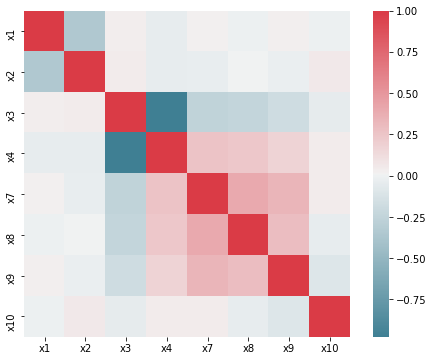

In [11]:
# plot correlation
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [12]:
# drop redundant features
# drop_cols = ['x3']
# features_scaled = features_scaled.drop(columns=drop_cols)

In [27]:
from sklearn.model_selection import train_test_split

# split train and test dataset
features = pd.concat([num_features_transformed, cat_features], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)
features.describe()

,x1,x2,x3,x4,x7,x8,x9,x10,x5,x6
count,994.00,994.00,994.00,994.00,994.00,994.00,994.00,994.00,994.00,994.00
mean,0.01,0.01,-0.38,0.44,-0.28,-0.48,-1.47,1.11,0.31,3.59
std,1.38,1.01,0.34,0.26,1.42,1.32,2.21,1.23,0.46,2.16
min,-5.15,-3.19,-1.16,-0.07,-4.69,-4.74,-10.86,-3.13,0.00,0.00
25%,-1.01,-0.66,-0.63,0.25,-1.27,-1.39,-2.93,0.33,0.00,1.00
50%,0.06,0.00,-0.39,0.45,-0.38,-0.53,-1.60,1.11,0.00,5.00
75%,0.95,0.71,-0.12,0.63,0.80,0.46,-0.08,1.87,1.00,5.00
max,4.76,3.25,0.45,0.97,3.62,2.95,4.27,5.69,1.00,6.00


In [28]:
# check numbers of each class
classes, cnts = np.unique(y_train, return_counts=True)
print('samples in training data:\n  {}'.format(cnts))

samples in training data:
  [207 360 128]


In [29]:
# function to calculate accuracy

from sklearn.metrics import accuracy_score

def accuracy_calculator(classifier):
    pred = classifier.predict(x_test)
    accuracy = round(accuracy_score(y_test, pred), 4)
    print('test accuracy: {}'.format(accuracy))

    lb = np.array(y_test)
    acc_per_class = []

    for i in range(3):
        y_i = pred[lb==i]
        acc_per_class.append(round(1 - y_i[y_i!=i].shape[0] / y_i.shape[0], 4))

    print('accuracy of classes:\n  {}'.format(acc_per_class))

In [30]:
# classifier 1: random forest
# use GridSearchCV to tune parameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()

parameters = {
    'n_estimators'      : [100],
    'max_depth'         : [None],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf'  : [1, 2, 3, 4, 5],
    'random_state'      : [0],
}

clf = GridSearchCV(estimator=rf_clf, param_grid=parameters, cv=5, n_jobs=-1)

clf.fit(x_train, y_train)

best_rf = clf.best_estimator_

In [31]:
# classifier 2: extremely randomized tree
# use GridSearchCV to tune parameters

from sklearn.ensemble import ExtraTreesClassifier

ef_clf = ExtraTreesClassifier()

parameters = {
    'n_estimators'      : [100],
    'max_depth'         : [None],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf'  : [1, 2, 3, 4, 5],
    'random_state'      : [0],
}

clf = GridSearchCV(estimator=ef_clf, param_grid=parameters, cv=5, n_jobs=-1)

clf.fit(x_train, y_train)

best_ef = clf.best_estimator_

In [32]:
# classifier 3: gradient tree boosting
# use GridSearchCV to tune parameters

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

parameters = {
    'learning_rate'     : [0.1],
    'n_estimators'      : [100],
    'max_depth'         : [3],
    'min_samples_split' : [1, 2, 3],
    'min_samples_leaf'  : [1, 2, 3],
    'random_state'      : [0],
}

clf = GridSearchCV(estimator=gb_clf, param_grid=parameters, cv=5, n_jobs=-1)

clf.fit(x_train, y_train)

best_gb = clf.best_estimator_

In [33]:
# apply voting classifer with
# classifier 1: random forest
# classifier 2: extremely randomized tree
# classifier 3: gradient tree boosting

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[('rf', best_rf), ('ef', best_ef), ('gb', best_gb)],
    voting='soft',
    weights=[1, 1, 1],
    n_jobs=-1
)

voting.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_split=3,
                                                     random_state=0)),
                             ('ef', ExtraTreesClassifier(random_state=0)),
                             ('gb',
                              GradientBoostingClassifier(min_samples_split=3,
                                                         random_state=0))],
                 n_jobs=-1, voting='soft', weights=[1, 1, 1])

In [43]:
# accuracy of voting
# accuracy_calculator(best_rf)
# accuracy_calculator(best_ef)
# accuracy_calculator(best_gb)
accuracy_calculator(voting)

test accuracy: 0.9064
accuracy of classes:
  [0.8636, 0.9744, 0.7818]


In [35]:
# process evluation data
all_evalu_data = pd.read_csv('EvaluateOnMe.csv', sep=',')

In [36]:
all_evalu_data = data_prepocessing(all_evalu_data)
all_evalu_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,-0.03,0.01,-0.47,0.57,0.30,3.64,0.02,-0.20,-1.04,1.04
std,1.43,1.01,0.42,0.36,0.46,2.13,1.42,1.37,2.01,1.29
min,-5.18,-4.22,-1.58,-0.07,0.00,0.00,-4.14,-3.91,-7.37,-3.88
25%,-0.99,-0.65,-0.76,0.28,0.00,2.00,-1.07,-1.18,-2.41,0.21
50%,-0.03,0.00,-0.44,0.55,0.00,5.00,-0.25,-0.47,-1.40,1.05
75%,0.95,0.69,-0.13,0.81,1.00,5.00,1.00,0.59,0.01,1.88
max,4.86,3.66,0.42,1.42,1.00,6.00,6.43,7.80,7.79,6.48


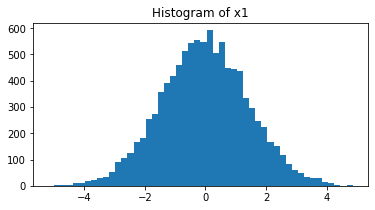

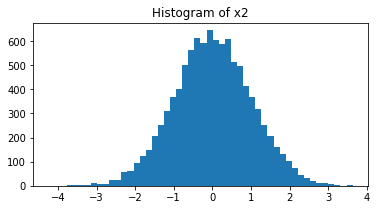

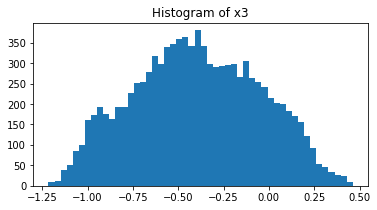

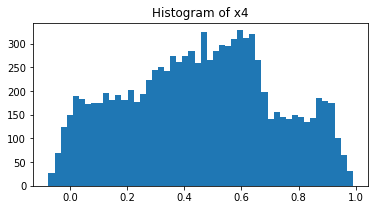

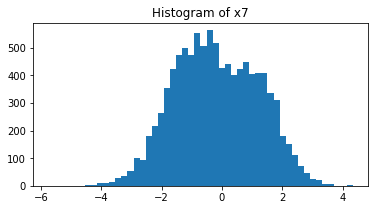

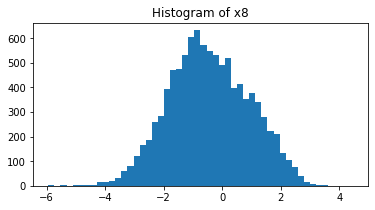

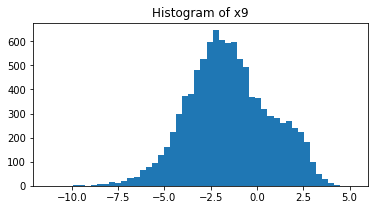

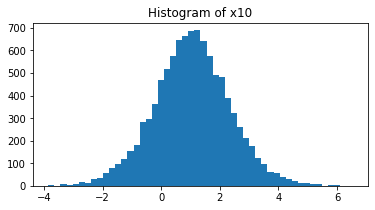

In [37]:
num_data = all_evalu_data[num_cols]
cat_data = all_evalu_data[cat_cols]
num_data_transformed = feature_transformer(num_data)
features_hist(num_data_transformed)

In [38]:
data = pd.concat([num_data_transformed, cat_data], axis=1)
data.describe()

,x1,x2,x3,x4,x7,x8,x9,x10,x5,x6
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,-0.03,0.01,-0.40,0.45,-0.18,-0.45,-1.50,1.05,0.30,3.64
std,1.43,1.01,0.35,0.26,1.38,1.37,2.23,1.29,0.46,2.13
min,-5.18,-4.25,-1.22,-0.07,-5.76,-5.94,-11.27,-3.86,0.00,0.00
25%,-0.99,-0.66,-0.65,0.26,-1.22,-1.41,-3.01,0.21,0.00,2.00
50%,-0.03,0.00,-0.40,0.46,-0.26,-0.51,-1.62,1.05,0.00,5.00
75%,0.95,0.69,-0.13,0.64,0.89,0.53,0.01,1.89,1.00,5.00
max,4.85,3.63,0.46,0.99,4.33,4.45,5.17,6.53,1.00,6.00


In [39]:
# make predictions
predictions = voting.predict(data)
predictions[:10]

array([0, 1, 2, 1, 0, 2, 0, 0, 2, 1])

In [40]:
# convert labels
results = []
for p in predictions:
    if p == 0:
        results.append('Atsuto')
    if p == 1:
        results.append('Bob')
    if p == 2:
        results.append('Jörg')
        
results[:10]

['Atsuto',
 'Bob',
 'Jörg',
 'Bob',
 'Atsuto',
 'Jörg',
 'Atsuto',
 'Atsuto',
 'Jörg',
 'Bob']

In [44]:
# write to txt file
with open('106716.txt', 'w') as f:
    for item in results:
        f.write("%s\n" % item)

In [45]:
# numbers in each class
classes, cnts = np.unique(results, return_counts=True)
print('all classes:\n  {}'.format(classes))
print('counts of classes:\n  {}'.format(cnts))
print('%:\n  {}'.format(cnts/len(results)))

all classes:
  ['Atsuto' 'Bob' 'Jörg']
counts of classes:
  [3050 5163 1787]
%:
  [0.305  0.5163 0.1787]
